We compute the whel that will roll on a certain curved road. 

First we define the road. The road is defined as a curve $y=f(x)$ with the property $y<0,\ \forall x\geq0$. We choose $f(x)=-\sqrt{2} +\cos(x)$. In this case the wheel will be a closed loop. 

The wheel is givenin polar coordinates, $(r(\theta,\theta(x))$. $\theta$ is computed via the folowing ODE: 
$$
\frac{d\theta}{dx} =\frac{-1}{f(x)}
$$
And, $r$ is compute via the equation $r(\theta)=-f(x)$

We know setup the plot interface, 

<IPython.core.display.Javascript object>


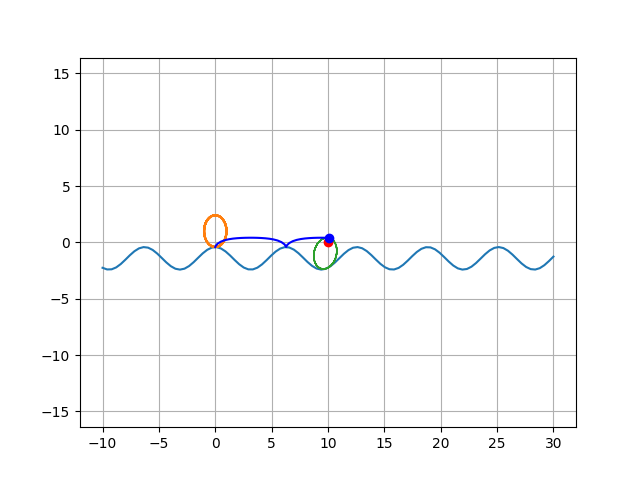

In [30]:
%matplotlib notebook
import os
import numpy as np 
import scipy.integrate as integrate 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# TODO: 
#    - Define ROAD class, 
#    - Define WHEEL class,

def road(x):
    """
    try:
        return -1 * np.ones(len(x))
    except :
        return -1    
    """
    return -np.sqrt(2)  + np.cos(x)
    # return -3.5  + np.cos(x)
    # return -np.sqrt(17) + np.cos(x)
    # return -np.sqrt(10) + np.cos(x)
    # return -1.887365 - (2./3.)*np.cos(x) + np.sin(x) - 0.5*np.sin(2.*x)

def df(y, t): 
    return -1./road(t)

# MAIN COMPUTATION PART 
tmin, tmax, nbt = 0, 20, 100
xmin, xmax = tmin - tmax/2, tmax + tmax/2

x = np.linspace(xmin, xmax, nbt)
t = np.linspace(tmin, xmax, nbt)

theta0 = -np.pi / 2.
ROAD0  = road(0)
theta  = np.reshape(integrate.odeint(df, theta0, t) , len(t))
R      = -road(t)

# PLOT PART 
ROAD = road(x)
ymin = np.amin(ROAD) - 1
if (np.amax(ROAD) > 0): 
    print("Road must stay below zero !")
    exit()
    # TODO: make an exception 
else:
    ymax =  -ymin

## Define the figure, 
fig = plt.figure()
ax  = fig.add_subplot(111, autoscale_on = False, xlim = (xmin, xmax), ylim = (ymin, ymax))
plt.axis('equal')
ax.grid()

## Plot the road 
plt.plot(x, ROAD)

## Plot the wheel
x0 = R * np.cos(theta)
y0 = R * np.sin(theta)

plt.plot(x0, y0)

## Define the dynamics part
lines = []

### The wheel
line, = ax.plot([], [], '-', lw = 1)
lines.append(line)

### The center of the wheel
line, = ax.plot([], [], 'ro')
lines.append(line)

### The initial point 
line, = ax.plot([], [], 'bo')
lines.append(line)

### The trace of the initial wheel
line, = ax.plot([], [], 'b-')
lines.append(line)

## Number of frames
nb_frames = nbt 

def init():
    lines[3].set_data([],[])
    return lines

def animate(i): 
    time = t[i]
    alpha = theta[i]

    # compute the wheel
    x1 =  np.cos(alpha-theta0) * x0 + np.sin(alpha-theta0) * y0 + time
    y1 = -np.sin(alpha-theta0) * x0 + np.cos(alpha-theta0) * y0 

    ## Plot the wheel
    lines[0].set_data(x1, y1)

    ## Plot the center
    lines[1].set_data(time, 0)
    
    ## Plot the initial point 
    in_x = np.sin(alpha-theta0)*ROAD0 + time
    in_y = np.cos(alpha-theta0)*ROAD0
    lines[2].set_data(in_x, in_y)

    ## Plot the trace of the initial point 
    lines[3].set_xdata(np.append(lines[3].get_xdata(), in_x))
    lines[3].set_ydata(np.append(lines[3].get_ydata(), in_y))

    return lines

anim = animation.FuncAnimation(fig, animate, frames = nb_frames, blit = True, init_func = init, repeat = True, interval = 50)
plt.show()